## Linear regresion - part 1
One variable

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from IPython.display import (
    display, 
    Math, 
    Latex
)
%matplotlib inline

In [2]:
df = pd.read_csv("ex1data1.txt", header=None)
df.columns = columns=['x', 'y']

Visualise data

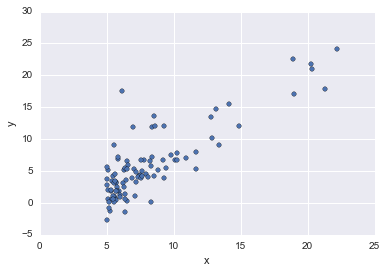

In [3]:
df.plot(kind='scatter', x='x', y='y')

We want create a function $h_{\theta}(x) = \theta_0 + \theta_1 x$ which will predict y for new unseen x.

Example $h_{\theta}(x) = 1 + 1.7x$ 

In [4]:
def h(theta, x):
    return theta[0] + theta[1]*x

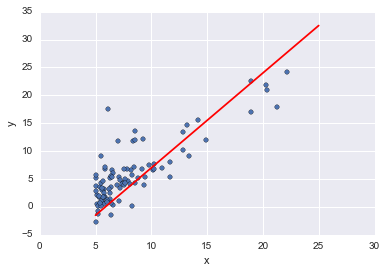

In [5]:
theta = [-10, 1.7]
df.plot(kind='scatter', x='x', y='y')
x = np.linspace(5, 25, 100)
plt.plot(
    x,
    h(theta, x),
    c='r'
)

Is it a good $h_{\theta}(x)$?

How can we measure how good is $h_{\theta}(x)$?

### Cost Function $J(\theta)$

We want to find such $\hat\theta$ that it minimize $J(\theta)$:

$$\theta = \left[\begin{array}{c} \theta_0 \\ \theta_1 \end{array}\right] \in \mathbb{R}^2 \quad J:\mathbb{R^2} \rightarrow \mathbb{R}$$

$$ \hat\theta = \underset{{\theta \in \mathbb{R}^{2}}}{\operatorname{arg\,min}} J(\theta)$$

$$\begin{array}{rll} J(\theta) &=& \dfrac{1}{2m} \displaystyle\sum_{i=1}^{m} \left(h_{\theta}(x^{(i)})  - y^{(i)}\right)^2  \\
& = & \dfrac{1}{2m} \displaystyle \sum_{i=1}^{m} \left(\theta_0 + \theta_1 x^{(i)}  - y^{(i)}\right)^2
\end{array} $$

where $m$ is # of examples in train data

In [6]:
def J(h, theta, x, y):
    m = len(y)
    return (1./(2*m) * np.sum((h(theta, x[i]) - y[i])**2 for i in xrange(m)))

In [7]:
display(Math(r"\Large J(\theta) = %.4f" % J(h, theta, df.x, df.y)))

<IPython.core.display.Math object>

Is it a big number or small? Is it a minimum?

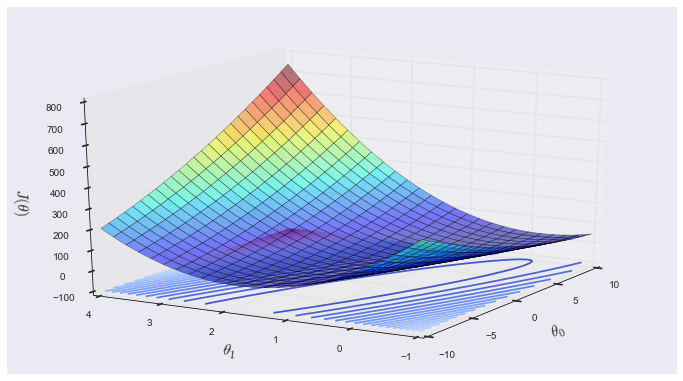

In [8]:
def errorSurface(x, y):
    pX = np.arange(-10,10.1,0.1)
    pY = np.arange(-1,4.1,0.1)
    pX, pY = np.meshgrid(pX, pY)
    
    pZ = np.matrix([[J(h,[t0, t1], x, y) 
                     for t0, t1 in zip(xRow, yRow)] 
                     for xRow, yRow in zip(pX, pY)])
    
    fig = plt.figure(figsize=(16*.6,9*.6))
    ax = fig.add_subplot(111, projection='3d')
    plt.subplots_adjust(left=0.0, right=1, bottom=0.0, top=1)
    ax.plot_surface(pX ,pY, pZ, rstride=2, cstride=8, linewidth=0.5,
                    alpha=0.5, cmap='jet', zorder=0,
                    label=r"$J(\theta)$")
    ax.view_init(elev=20., azim=-150)

    ax.set_xlim3d(-10, 10);
    ax.set_ylim3d(-1, 4);
    ax.set_zlim3d(-100, 800);

    N = range(0,800,20)
    plt.contour(pX, pY, pZ, N, zdir='z',offset=-100, cmap='coolwarm', alpha=1)
    
    ax.set_zlabel(r"$J(\theta)$", fontsize="15")
    ax.set_xlabel(r"$\theta_0$", fontsize="15")
    ax.set_ylabel(r"$\theta_1$", fontsize="15")
    ax.margins(0,0,0)
    fig.tight_layout()
    return fig, ax
fig, ax = errorSurface(df.x, df.y)

It's a convex function. So there is only one minimum!

How can we find best $\hat\theta$?

## Gradinet Descent Algorithm

$$\theta_j := \theta_j - \alpha \dfrac{\partial}{\partial\theta_j}J(\theta) \textrm{ for each $j$}$$

Where
$$\small
\begin{array}{rcl}
\dfrac{\partial}{\partial\theta_j} J(\theta) 
 & = & \dfrac{\partial}{\partial\theta_j} \dfrac{1}{2m} \displaystyle\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2\\
 & = & 2 \cdot \dfrac{1}{2m} \displaystyle\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) \cdot \dfrac{\partial}{\partial\theta_j} (h_\theta(x^{(i)}) - y^{(i)})\\
 & = & \dfrac{1}{m}\displaystyle\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) \cdot \dfrac{\partial}{\partial\theta_j} \left(\displaystyle\sum_{i=0}^n \theta_ix_i^{(i)} - y^{(i)}\right)\\
 & = & \dfrac{1}{m}\displaystyle\sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}\\
\end{array}
$$

### Stop condition
1. after some # of iterations
2. when error change by less than some choosen $\epsilon$

# Assigment 1.
Impement GD Algorithm and try different $\alpha$ 

# Assigment 2.
Plot $J(\theta)$ againts number of iterations for differenet parameters $\alpha$

# Assigment 3.
Use $\hat\theta$ and predict y for x = 1, 10, 100